## LDA for Weibo

In [13]:
import pandas as pd     # 数据表
import numpy as np     # 数组
import re     # 正则表达式
import jieba     # 中文分词
import matplotlib.pyplot as plt     # 画图
from gensim import corpora, models
import pyLDAvis     # 交互式LDA可视化
import pyLDAvis.gensim_models as gensimvis

In [3]:
df = pd.read_excel('text_analysis_weibo_sample.xlsx', index_col = 0)

In [4]:
df.head()

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,34121,国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建
3,27378,近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...,0,0,0,NaN,0,0,北京
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东


### Preprocessing

In [5]:
'''
re.sub函数用于替换字符串中的匹配项
[^\u4e00-\u9fa5]表示非中文字符
nonums是一个变量名，它是"no numbers"的缩写，意思是"没有数字"。
nonums被用来存储经过处理的字符串，即从原始文本text中移除所有非中文字符后的结果。
'''

def remove_nums(text):
    nonums = re.sub('[^\u4e00-\u9fa5]+', '', text)
    return nonums
test = df['标题/微博内容'][0]
remove_nums(test)

'国债地产行业重磅利好提振风险偏好期债低开低走国债期货全线收跌年期主力合约跌年期主力合约跌年期主力合约跌三大主力合约均创逾一年收盘新低行情解读公开市场方面央行开展了亿元天期逆回购操作中标利率亿元逆回购到期因此当日净投放亿元资金面方面央行公开市场逆回购继续加力不过银行间市场周二资金供给趋于收敛七天回购加权利率进一步上行长期资金方面全国和主要股份制银行一年期同业存单报价仍维持在水平不过目前尚无成交量配合房地产行业再度迎来重磅利好证监会宣布在涉房企业股权融资方面调整优化五项措施并自即日起施行随着证监会支持房企股权融资这第三支箭正式发射信贷债券股权三个融资渠道三箭齐发合力推动房地产融资第三支箭快速落地或将为房地产行业注入较大规模的增量资金和资产促进行业平稳健康发展在短短天的时间内政策端三箭齐发强势托底提振各方的信心看好全行业的信用复苏以及在因城施策空间逐步打开下的销售回暖国务院联防联控机制月日召开新闻发布会针对考虑到最近个别地方的不满情绪政府是否会重新考虑疫情应对政策的问题国家卫生健康委新闻发言人宣传司副司长米锋称疫情发生以来中国政府一直根据病毒变异的特点和临床治疗的实践认识边防控边研究边总结边调整针对奥密克戎变异株传播力和致病力的特性以及重症率死亡率等情况包括密切关注国际上一些疫情形势的变化对于防控的措施我们一直在研究不断在调整最大程度保护人民利益最大限度减少疫情对经济社会发展的影响近期政策端对房地产的金融支持明显加强稳地产与宽信用绑定在一起房地产业关联很多上下游行业其良性循环对经济健康发展具有重要意义年末稳增长诉求提升央行降准助力稳增长熨平流动性压力支持信贷投放促进综合融资成本稳中有降落实稳经济一揽子政策措施巩固经济回稳向上基础提振市场风险偏好股市大涨债市承压与此同时市场对资金长期预期暂不明朗短期内看空气氛略重操作建议目前三大期债主力连续和加权合约反弹至月日跳空缺口以及前期日日日多周期均线附近承压回落在多重技术指标压制下逢高偏空思路对待股指稳地产政策升级股指全线走高截止月日周二收盘上证指数涨报深证成指涨报创业板指涨报基本面信息上市房企再融资重启打响第一枪福星股份公告拟向不超过名特定投资者非公开发行股票拟发行数量不超过本次发行前公司总股本的募集资金拟用于公司房地产项目开发国家能源局发布关于积极推动新能源发电项目应并尽并能并早并有关工作的通知通知表示各单位加大统筹协调力度加

### Parsing

In [7]:
# 加载中文停用词词典，可个性化设置
stopwords = open('stopwords.txt', encoding = 'utf-8').read()

# w for w in words表示遍历列表words中的每个元素，并将元素值赋给变量w。
# 创建一个新的words列表，其中不包含stopwords列表中的词，以及不包含'['和']'。

def clean_text(text):
    words = jieba.lcut(text)
    words = [w for w in words if w not in stopwords and w!='[' and w!=']']
    return ' '.join(words)
test = df['标题/微博内容'][0]
clean_text(test)

'国债 地产 行业 重磅 利好 提振 风险 偏好 期债 低开 低 走 国债 期货 全线 收跌 10 年期 主力 合约 跌 0.37% 5 年期 主力 合约 跌 0.24% 年期 主力 合约 跌 0.11% 三大 主力 合约 均 创 逾 一年 收盘 新低 行情 解读 公开市场 央行 800 亿元 7 天期 逆 回购 操作 中标 利率 2.0% 亿元 逆 回购 到期 当日 净 投放 780 亿元 资金面 央行 公开市场 逆 回购 加力 银行 市场 周二 资金 供给 趋于 收敛 七天 回购 加权 利率 进一步 上行 长期 资金 全国 股份制 银行 一年期 同业 存单 报价 2.45% 水平 尚无 成交量 配合 3 房地产 行业 再度 迎来 重磅 利好 证监会 涉房 企业 股权 融资 调整 优化 五项 措施 自即日起 施行 证监会 支持 房企 股权 融资 第三支 箭 正式 发射 信贷 债券 股权 三个 融资 渠道 三箭 齐发 合力 推动 房地产 融资 第三支 箭 快速 落地 房地产 行业 注入 大规模 增量 资金 资产 行业 平稳 健康 发展 短短 时间 政策 端 三箭 齐发 强势 托底 提振 各方 信心 看好 行业 信用 复苏 因城 施策 空间 打开 销售 回暖 4 国务院 联防 联控 机制 11 月 29 日 15 新闻 发布会 针对 地方 不满情绪 政府 重新考虑 疫情 应对 政策 国家 卫生 健康 委 新闻 发言人 宣传司 副司长 米锋 称 疫情 发生 中国政府 病毒 变异 临床 治疗 实践 防控 研究 调整 针对 奥密克戎 变异 株 传播 致病 特性 重症 率 死亡率 情况 包括 关注 国际 疫情 形势 变化 防控 措施 研究 调整 程度 保护 人民 利益 限度 减少 疫情 经济社会 发展 影响 5 近期 政策 端 房地产 金融 支持 稳 地产 宽 信用 绑定 房地产业 关联 很多 上下游 行业 良性循环 经济 健康 发展 意义 年末 稳 增长 诉求 提升 央行 降准 助力 稳 增长 熨平 流动性 压力 支持 信贷 投放 综合 融资 成本 稳中有降 落实 稳 经济 一揽子 政策措施 经济 回稳 向上 基础 提振 市场 风险 偏好 股市 大涨 债市 承压 市场 资金 长期 预期 暂 不明朗 短期内 看空 气氛 略重 操作 建议 三大期 债 主力 连续 加权 合约 反

In [8]:
# 将标题/微博内容列中的每个元素（即每条微博）转换为分词后的文本

df['标题/微博内容'] = df['标题/微博内容'].astype(str) # 将标题/微博内容列中的每个元素转换为字符串
df['微博内容分词'] = df['标题/微博内容'].apply(remove_nums)
df['微博内容分词'] = df['微博内容分词'].apply(clean_text)
df['微博内容分词'] = df['微博内容分词'].apply(lambda x: x.split()) # 将分词后的文本转换为列表
df

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域,微博内容分词
0,34121,国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他,"[国债, 地产, 行业, 重磅, 利好, 提振, 风险, 偏好, 期债, 低开, 低, 走,..."
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西,"[喜迎, 二十大, 忠诚, 保平安]"
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建,"[事关, 明日, 教资, 考试, 福建省, 教育, 考试院, 发布, 补充, 公告, 福建省..."
3,27378,近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...,0,0,0,NaN,0,0,北京,"[近日, 千年, 大计, 雄安, 新区, 迎来, 五周岁, 生日, 一张白纸, 塔吊, 林立..."
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东,"[樊振东, 牛, 逼]"
...,...,...,...,...,...,...,...,...,...,...
95,14034,老公好漂亮[舔屏],0,0,0,aa7af97ae98cbe8983e559b948ecfabf,825,191,北京,"[老公, 漂亮, 舔, 屏]"
96,35249,恭喜@张小娜呀娜 1名用户获得【小飞T】。C官方唯一抽奖工具@C抽奖平台 对本次抽奖进行监督...,0,0,2,f538513e5801c275cbcf285517a8ee62,51709,20,北京,"[恭喜, 张小娜, 娜, 名, 用户, 小飞, 官方, 唯一, 抽奖, 工具, 抽奖, 平台..."
97,39598,接不动了，居民部门负债率提升空间太有限了。现在动辄几万一平米，总价高，月供高，预期转差，还怎...,0,0,0,2e76c39b6665a0b6f5bdc4c35f36f573,0,59,四川,"[接不动, 居民, 部门, 负债率, 提升, 空间, 有限, 动辄, 几万, 平米, 总价,..."
98,48977,目前电子烟政策已从制定阶段逐渐走向实施阶段，而主要的电子烟公司股价下跌幅度高达70%-...,0,0,0,NaN,0,0,北京,"[电子, 烟, 政策, 制定, 阶段, 走向, 实施, 阶段, 电子, 烟, 股价, 下跌,..."


### LDA (weibo)

dictionary = corpora.Dictionary(df['微博内容分词'])：这行代码创建了一个字典，其中包含了所有在df['微博内容分词']列中出现的唯一词语。每个词语都被赋予一个唯一的整数ID。df['微博内容分词']应该是一个包含分词结果的Series。

corpus = [dictionary.doc2bow(text) for text in df['微博内容分词']]：这行代码创建了一个语料库。语料库是一个列表，其中每个元素都是一个包含元组的列表，每个元组代表一个词语及其在文档中的出现次数。dictionary.doc2bow(text)将文本转换为词袋模型，即将文本转换为一个包含词语ID和词频的元组列表。

In [9]:
# 根据分词结果创建字典
dictionary = corpora.Dictionary(df['微博内容分词'])

# 根据分词结果创建语料库
corpus = [dictionary.doc2bow(text) for text in df['微博内容分词']]

### 评估主题模型的质量

评估主题模型的质量通常有两种方法：一种是基于人工的定性评估，另一种是基于计算的定量评估。

**定性评估**：这种方法通常需要人工查看生成的主题，并判断这些主题是否符合人的直觉和预期。例如，一个好的主题模型生成的主题应该是互相区分开的（即每个主题都有其独特的词），并且每个主题的词都应该有共同的主题或含义。

**定量评估**：这种方法使用一些数学指标来评估主题模型的质量。常见的指标包括困惑度（Perplexity）和主题一致性（Topic Coherence）。

* 困惑度：困惑度是衡量主题模型预测新文档的能力的指标。较低的困惑度表示主题模型有较好的预测能力。

* 一致性：主题一致性衡量一个主题内部的词的一致性。较高的主题一致性表示主题的词更加相关，因此主题的质量更高。

在<kbd>gensim</kbd>库中，可以使用<kbd>log_perplexity</kbd>方法来计算困惑度，使用<kbd>CoherenceModel</kbd>类来计算主题一致性。

为从2到5的主题数训练LDA模型，并计算每个模型的一致性和困惑度。  
然后，绘制两个图，分别展示了主题数与一致性和困惑度的关系。  
可以通过查看这两个图来选择最佳的主题数。

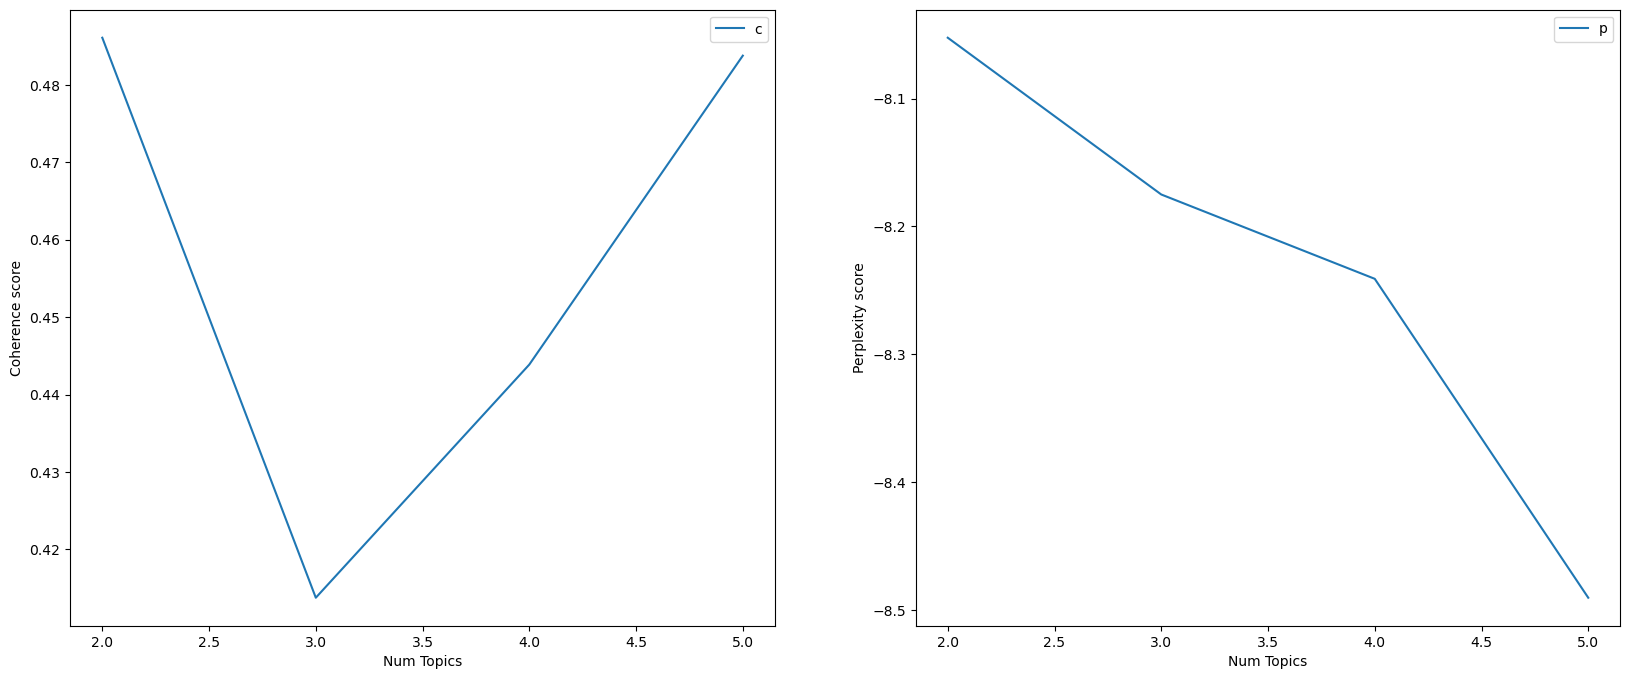

In [9]:
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

def compute_coherence_and_perplexity(dictionary, corpus, texts, start=2, limit=6, step=1):
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(model.log_perplexity(corpus))

    return model_list, coherence_values, perplexity_values

# Can take a long time to run.
model_list, coherence_values, perplexity_values = compute_coherence_and_perplexity(dictionary=dictionary, corpus=corpus, texts=df['微博内容分词'], start=2, limit=6, step=1)

# Show graph
x = range(2, 6, 1)
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')

plt.subplot(1, 2, 2)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')

plt.show()

在上述代码中，<kbd>model.log_perplexity(corpus)</kbd> 是计算对数困惑度的函数。
  
对数困惑度是困惑度的对数值，因此，如果困惑度小于1，对数困惑度就会是负的。如果困惑度小于1，那么说明模型对数据的预测非常准确。这可能意味着模型已经非常好地捕捉到了数据的特性，或者数据可能有一些特别的模式，使得模型能够非常准确地进行预测。

然而，也要注意，如果困惑度过低，可能也意味着模型过拟合了数据。过拟合是指模型过于复杂，以至于不仅学习了数据的一般性质，还学习了数据中的噪声或异常值。过拟合的模型在训练数据上的表现很好，但在新的、未见过的数据上的表现可能就不好了。

**判断模型是否过拟合**

通常需要通过在一个独立的验证集（或称为测试集）上评估模型的性能。以下是一种可能的方法：  
* 将数据集分为训练集和测试集。
* 使用训练集来训练模型。
* 使用训练好的模型来预测测试集的结果，并计算测试集的困惑度。

如果模型在训练集上的困惑度远低于在测试集上的困惑度，那么这可能是过拟合的一个信号。

In [ ]:
'''
#需要先安装 sklearn 库（可以通过 pip install sklearn 命令安装），并且从中导入 train_test_split 函数
#（通过 from sklearn.model_selection import train_test_split 命令导入）

# 假设 corpus 是完整语料库
train_corpus, test_corpus = train_test_split(corpus, test_size=0.2)

# 使用训练集训练模型
model = LdaModel(train_corpus, num_topics=10)

# 计算训练集和测试集的困惑度
train_perplexity = model.log_perplexity(train_corpus)
test_perplexity = model.log_perplexity(test_corpus)

print(f"Train Perplexity: {train_perplexity}")
print(f"Test Perplexity: {test_perplexity}")

'''

虽然在主题数为5时，一致性得分最高，困惑度得分最低，但是还需要考虑到模型的复杂性和可解释性。  
选择主题数为4，因为它在保持较高的一致性得分和较低的困惑度得分的同时，模型的复杂性和可解释性也较好。

In [10]:
# 训练LDA模型
lda_model = models.LdaModel(corpus, num_topics=4, id2word=dictionary, passes=15)

In [11]:
# 查看主题
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.014*"考生" + 0.008*"考试" + 0.007*"考场" + 0.006*"刘雨昕" + 0.005*"考点"')
(1, '0.018*"月" + 0.016*"万吨" + 0.011*"市场" + 0.010*"日" + 0.009*"库存"')
(2, '0.014*"月" + 0.008*"加息" + 0.008*"市场" + 0.007*"通胀" + 0.006*"预期"')
(3, '0.014*"电子" + 0.014*"烟" + 0.012*"中国" + 0.008*"发展" + 0.007*"数字"')


### 可视化主题分布图

In [12]:
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary, n_jobs=1)
# 备注：上述语句如果在数据量比较大的时候跑不出来，可以选择加一个n_jobs=1的参数，降低计算量，避免报错
# 显示可视化界面
pyLDAvis.display(lda_vis)

In [42]:
# 导出可视化结果到html
# pyLDAvis.save_html(lda_vis, 'lda_visualization.html')

## LDA for Congressional Record

In [2]:
import pandas as pd
import  numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv(r'D:\data\session_043_with_party.csv')
df

,speech_id,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count,speech,party
0,430000001,S,18730304.0,1.0,The VICE-PRESIDENT,Unknown,Unknown,Unknown,Special,39.0,65.0,03041873.txt,972.0,161.0,The Secretary will read the names of the newly...,NaN
1,430000002,S,18730304.0,2.0,Mr. HAMLIN,Unknown,HAMLIN,Unknown,M,66.0,71.0,03041873.txt,298.0,54.0,said: Mr. President. owing to some inadvertenc...,R
2,430000003,S,18730304.0,3.0,The VICE-PRESIDENT,Unknown,Unknown,Unknown,Special,72.0,73.0,03041873.txt,56.0,11.0,The question is on the motion of the Senator f...,NaN
3,430000004,S,18730304.0,4.0,The VICE-PRESIDENT,Unknown,Unknown,Unknown,Special,137.0,147.0,03041873.txt,472.0,75.0,The order of proceedings will now be formed. f...,NaN
4,430000005,S,18730304.0,5.0,The PRESIDENT,Unknown,Unknown,Unknown,Special,148.0,158.0,03041873.txt,454.0,72.0,of the United States. the PRESIDENTELEcT. The ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117327,430119298,H,18750303.0,3931.0,Mr. GARFIELD,Unknown,GARFIELD,Unknown,M,29300.0,29303.0,03031875.txt,213.0,39.0,I also present the report of the expenditures ...,R
117328,430119299,H,18750303.0,3932.0,Mr. HOLMAN,Unknown,HOLMAN,Unknown,M,29380.0,29382.0,03031875.txt,145.0,28.0,I ask that the amendment to this bill may be r...,D
117329,430119300,H,18750303.0,3933.0,Mr. HOLMAN,Unknown,HOLMAN,Unknown,M,29383.0,29385.0,03031875.txt,82.0,14.0,I move concurrence in the amendment of the Sen...,D
117330,430119301,H,18750303.0,3934.0,Mr. DAWES,Unknown,DAWES,Unknown,M,29930.0,29935.0,03031875.txt,355.0,60.0,Mr. Speaker. the joint committee of the two Ho...,R


In [4]:
# 43rd共有四位少数族裔议员，他们的last_name分别是LYNCH, RAPIER, RANSIER, CAIN
names = ["LYNCH", "RAPIER", "RANSIER", "CAIN"]

# 计算少数族裔占有多少行
minority_count = sum(df['last_name'].isin(names))
minority_count

69

这一届所有议员一共有117332行speech，少数族裔议员只有69行。  
我需要从除去少数族裔的行数中抽出一小部分用作训练集，然后将少数族裔议员的69行speech用作测试集。对少数族裔议员的发言进行主题建模，看看选择多少个主题数量最合适。  
在此之前要对训练集和测试集的speech都进行数据清洗，包括：小写、分词、去停用词、词性还原、去除标点数字与其他字符。

In [5]:
# 从非少数族裔议员的发言中随机抽取1%作为训练集
non_minority_speeches = df[~df['last_name'].isin(names)]['speech'].sample(frac=0.01)

# 选择少数族裔议员的发言作为测试集
minority_speeches = df[df['last_name'].isin(names)]['speech']

In [6]:
non_minority_speeches

45796     I will. Mr. E. R. HOAR. The President does not...
70152     Wherever there has been any litigation the cos...
2308      I offer the following resolution: Resoloed Tha...
87877     Debate on the question of consideration can on...
116055    Is there any law for that? I make the point of...
                                ...                        
108535                     The gentlemans time has expired.
48179     I object. I do not object to a morning hour to...
85224     There is the proof of the allegation which I m...
42709     I tush usauiintons estcct that we may go litto...
81008                    May I ask the Senator a question ?
Name: speech, Length: 1173, dtype: object

In [7]:
# 定义数据清洗函数
def preprocess(text):
    # 转为小写
    text = text.lower()
    # 分词
    words = word_tokenize(text)
    # 去停用词
    words = [word for word in words if word not in stopwords.words('english')]
    # 词性还原
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # 去除标点数字与其他字符
    words = [word for word in words if word.isalpha()]
    return words

In [8]:
# 清洗训练集和测试集的数据
train_corpus = [preprocess(speech) for speech in non_minority_speeches]
test_corpus = [preprocess(speech) for speech in minority_speeches]

In [9]:
from gensim.corpora import Dictionary

# 创建字典
dictionary = Dictionary(train_corpus)

In [10]:
# 将文本转换为词袋模型
train_corpus = [dictionary.doc2bow(text) for text in train_corpus]
test_corpus = [dictionary.doc2bow(text) for text in test_corpus]

In [11]:
from gensim.models import LdaModel
# 使用训练集训练主题模型（需要通过计算困惑度和一致性找到合适的主题数，此步骤未完成）
# model_list, coherence_values, perplexity_values = compute_coherence_and_perplexity(dictionary=dictionary, corpus=train_corpus, texts=non_minority_speeches, start=2, limit=6, step=1)

model = LdaModel(train_corpus, id2word=dictionary, num_topics=4)

In [12]:
# 计算训练集和测试集的困惑度
train_perplexity = model.log_perplexity(train_corpus)
test_perplexity = model.log_perplexity(test_corpus)

print(f"Train Perplexity: {train_perplexity}")
print(f"Test Perplexity: {test_perplexity}")

Train Perplexity: -8.684193792105015
Test Perplexity: -10.04053569411454


In [13]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# model 是已经训练好的 LDA 模型
# test_corpus 是测试集
# id2word 是词典，它是一个从单词 ID 到单词的映射

# 使用模型对测试集进行主题建模
test_topics = model[test_corpus]

In [14]:
# 使用 pyLDAvis 进行可视化
lda_vis = gensimvis.prepare(model, test_topics, dictionary)
pyLDAvis.display(lda_vis)

在pyLDAvis的可视化中，词项的颜色表示了该词项在特定主题中的“显著性”。红色表示该词项在特定主题中的权重较高，而蓝色表示该词项在其他主题中的权重较高。因此，如果你看到一个主题的所有词项都是红色的，那么可能表示这些词在该主题中的权重非常高，这个主题可能非常“纯粹”，即它主要由这些词构成。

在使用 pyLDAvis 进行 LDA 主题模型可视化时，每个词对应的蓝色条表示该词在整个语料库中的频率。

如果发现每个词对应的蓝色条都满了并且一样长，这可能是因为你的数据集中每个词的频率都相同，或者你的模型没有正确地学习到词的分布。

这可能是由以下几个原因导致的：

* 数据预处理问题：如果你在数据预处理阶段没有正确地清洗数据，例如没有去除停用词，那么这些高频但无意义的词可能会影响模型的学习。

* 模型参数问题：如果你的模型参数设置不合适，例如主题数量设置得太大或太小，那么模型可能无法正确地学习到词的分布。

* 模型训练问题：如果你的模型没有充分地训练，那么模型可能无法正确地学习到词的分布。

如果你发现所有的主题中的词都差不多，这可能意味着你的模型没有很好地区分不同的主题。这可能是由于以下几个原因：

1. 模型参数：可能是你的模型参数设置不合适，比如主题数量设置得过多或过少，或者模型的训练迭代次数不够。

2. 文本预处理：在进行主题模型训练之前，通常需要对文本进行预处理，如去除停用词、词干提取等。如果预处理步骤不够，可能会导致模型无法区分不同的主题。

3. 数据集特性：如果你的数据集中的文档都非常相似，那么模型可能很难找到不同的主题。

针对这个问题，你可以尝试以下几种解决方案：

1. 调整模型参数：你可以尝试调整模型的参数，比如增加或减少主题数量，增加模型的训练迭代次数等。

2. 改进文本预处理：你可以尝试改进你的文本预处理步骤，比如添加更多的停用词，或者使用更复杂的词干提取或词形还原方法。

3. 使用更复杂的模型：如果上述方法都无法解决问题，你可能需要使用更复杂的主题模型，比如结构化主题模型（Structured Topic Models）或者神经网络主题模型（Neural Topic Models）。